In [1]:
import numpy as np
import pandas as pd

import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
df1 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link7.csv')
df2 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link2.csv')
df3 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link3.csv')
df4 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link4.csv')
df5 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link5.csv')
df6 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link6.csv')
df7 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link1.csv')
df8 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link8.csv')

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df2,df1,df7,df6,df8,df4,df5,df3])
df.reset_index(inplace=True)
df

,index,Timestamp,Tx_Packet,Rx_Packet,Dropped,BW_Utilization
0,0,2020-11-06 04:30:24,33,34,0,4.584070e+04
1,1,2020-11-06 04:31:21,35,33,0,4.626071e+04
2,2,2020-11-06 04:35:26,40,5,0,4.150660e+05
3,3,2020-11-06 04:35:27,143,1,0,4.224566e+06
4,4,2020-11-06 04:35:28,142,0,0,4.165482e+06
...,...,...,...,...,...,...
3401,120,2020-11-06 04:39:41,327,274,0,8.398220e+05
3402,121,2020-11-06 04:39:41,217,0,0,3.031080e+05
3403,122,2020-11-06 04:39:41,304,3,0,4.266560e+05
3404,123,2020-11-06 04:39:42,913,1,0,1.280100e+06


In [3]:
df = df[['BW_Utilization']]
df

,BW_Utilization
0,4.584070e+04
1,4.626071e+04
2,4.150660e+05
3,4.224566e+06
4,4.165482e+06
...,...
3401,8.398220e+05
3402,3.031080e+05
3403,4.266560e+05
3404,1.280100e+06


In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

df

array([[0.00298178],
       [0.00303186],
       [0.04701144],
       ...,
       [0.04839353],
       [0.15016566],
       [0.09962279]])

In [5]:
df = pd.DataFrame(data = df, 
                  columns = ['BW_Utilization']) 
df

,BW_Utilization
0,0.002982
1,0.003032
2,0.047011
3,0.501290
4,0.494244
...,...
3401,0.097663
3402,0.033661
3403,0.048394
3404,0.150166


In [6]:
future_days = 652

In [7]:
df['Prediction'] = df[['BW_Utilization']].shift(-future_days)
df

,BW_Utilization,Prediction
0,0.002982,0.105737
1,0.003032,0.103233
2,0.047011,0.115641
3,0.501290,0.120118
4,0.494244,0.117776
...,...,...
3401,0.097663,NaN
3402,0.033661,NaN
3403,0.048394,NaN
3404,0.150166,NaN


In [8]:
x = np.array(df.drop(['Prediction'],1))[:-future_days]
x

array([[0.00298178],
       [0.00303186],
       [0.04701144],
       ...,
       [0.73213439],
       [0.73512777],
       [0.7769278 ]])

In [9]:
y = np.array(df['Prediction'])[:-future_days]
y

array([0.10573691, 0.10323341, 0.11564052, ..., 0.04839353, 0.15016566,
       0.09962279])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [11]:
# DT Regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Linear Regression model
lr = LinearRegression().fit(x_train, y_train)

In [12]:
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)

#convert to np array
x_future = np.array(x_future)
x_future

array([[0.49425102],
       [0.49777386],
       [0.50833525],
       [0.49072817],
       [0.49425102],
       [0.5048124 ],
       [0.5153881 ],
       [0.54356372],
       [0.52594948],
       [0.53651802],
       [0.5118581 ],
       [0.5118581 ],
       [0.51891094],
       [0.51538094],
       [0.52947233],
       [0.52242664],
       [0.52594948],
       [0.52595664],
       [0.54356372],
       [0.5048124 ],
       [0.50833525],
       [0.52594948],
       [0.52595664],
       [0.51538094],
       [0.50128956],
       [0.5118581 ],
       [0.53651802],
       [0.54709372],
       [0.49072102],
       [0.51890379],
       [0.53651802],
       [0.53299518],
       [0.50129671],
       [0.52242664],
       [0.54005089],
       [0.51538094],
       [0.5153881 ],
       [0.52594948],
       [0.51538094],
       [0.54359377],
       [0.49778388],
       [0.53651802],
       [0.51890379],
       [0.52594948],
       [0.5118581 ],
       [0.53300233],
       [0.5118581 ],
       [0.536

In [13]:
x_future.shape

(652, 1)

In [14]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

[0.51872057 0.48995362 0.58053867 0.42460445 0.51872057 0.70387943
 0.71627526 0.76118799 0.805269   0.66484123 0.67209366 0.67209366
 0.85276969 0.78481067 0.85898925 0.72278992 0.805269   0.66563465
 0.76118799 0.70387943 0.58053867 0.805269   0.66563465 0.78481067
 0.4561432  0.67209366 0.66484123 0.7276622  0.55167314 0.75636343
 0.66484123 0.57115912 0.62396318 0.72278992 0.8321457  0.78481067
 0.71627526 0.805269   0.78481067 0.76051166 0.72916534 0.66484123
 0.75636343 0.805269   0.67209366 0.73811161 0.67209366 0.66484123
 0.72278992 0.7276622  0.67209366 0.75636343 0.57115912 0.67209366
 0.45410926 0.81824549 0.78481067 0.76118799 0.73811161 0.66484123
 0.4561432  0.805269   0.67209366 0.66484123 0.66563465 0.78481067
 0.80921726 0.72278992 0.77073688 0.76051166 0.72278992 0.66484123
 0.73512777 0.70825173 0.77991403 0.51872057 0.62396318 0.48995362
 0.55167314 0.62396318 0.51872057 0.46475052 0.55167314 0.51872057
 0.48995362 0.55167314 0.62396318 0.51872057 0.62396318 0.5844

In [15]:
predictions = tree_prediction

valid = df[x.shape[0]:] #x.shape(0) = 1233
valid['Prediction'] = predictions

valid

C:\Users\Luxuss\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,BW_Utilization,Prediction
2754,0.726169,0.518721
2755,0.714217,0.489954
2756,0.726162,0.580539
2757,0.753045,0.424604
2758,0.779914,0.518721
...,...,...
3401,0.097663,0.074829
3402,0.033661,0.070031
3403,0.048394,0.099800
3404,0.150166,0.090824


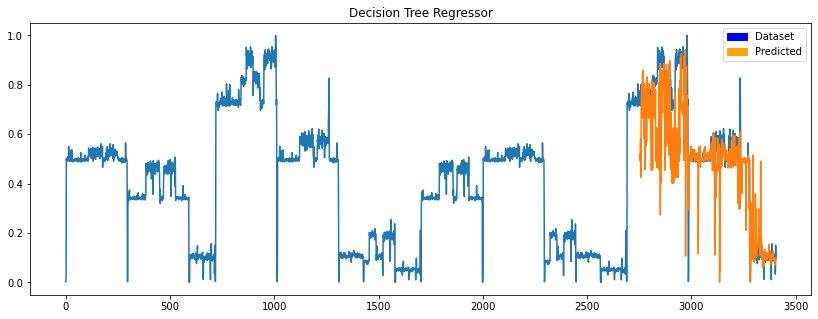

In [16]:
plt.figure(figsize=(14,5))
plt.title('Decision Tree Regressor')
plt.plot(df['BW_Utilization'])
plt.plot(valid[['Prediction']])
blue = mpatches.Patch(color='blue', label='Dataset')
orange = mpatches.Patch(color='orange', label='Predicted')
plt.legend(handles=[blue, orange])

plt.show()

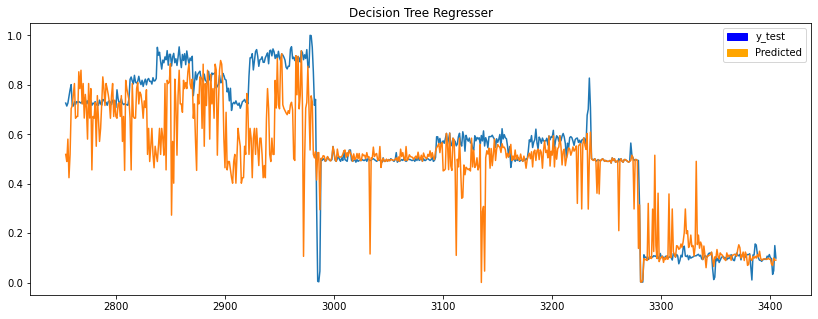

In [17]:
plt.figure(figsize=(14,5))
plt.title('Decision Tree Regresser')
plt.plot(valid[['BW_Utilization','Prediction']])
blue = mpatches.Patch(color='blue', label='y_test')
orange = mpatches.Patch(color='orange', label='Predicted')
plt.legend(handles=[blue, orange])

plt.show()

In [18]:
math.sqrt(mean_squared_error(y_test[-future_days:],tree_prediction))

0.34754963367754443

In [19]:
mean_absolute_error(y_test[-future_days:], tree_prediction)

0.2799965665568345

In [20]:
predictions = lr_prediction

valid = df[x.shape[0]:] #x.shape(0) = 1233
valid['Prediction'] = predictions

valid

C:\Users\Luxuss\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,BW_Utilization,Prediction
2754,0.726169,0.388273
2755,0.714217,0.387485
2756,0.726162,0.385122
2757,0.753045,0.389061
2758,0.779914,0.388273
...,...,...
3401,0.097663,0.335715
3402,0.033661,0.333041
3403,0.048394,0.335047
3404,0.150166,0.334377


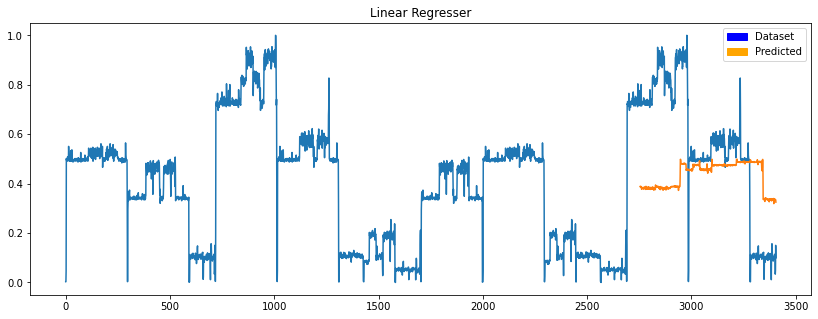

In [21]:
plt.figure(figsize=(14,5))
plt.title('Linear Regresser')
plt.plot(df['BW_Utilization'])
plt.plot(valid[['Prediction']])
blue = mpatches.Patch(color='blue', label='Dataset')
orange = mpatches.Patch(color='orange', label='Predicted')
plt.legend(handles=[blue, orange])

plt.show()

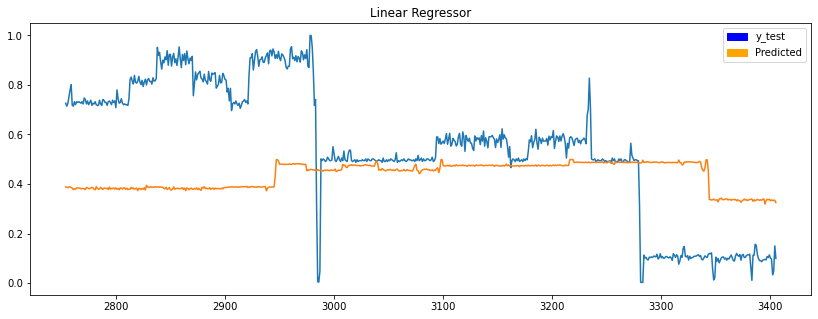

In [22]:
plt.figure(figsize=(14,5))
plt.title('Linear Regressor')
plt.plot(valid[['BW_Utilization','Prediction']])
blue = mpatches.Patch(color='blue', label='y_test')
orange = mpatches.Patch(color='orange', label='Predicted')
plt.legend(handles=[blue, orange])

plt.show()

In [23]:
math.sqrt(mean_squared_error(y_test[-future_days:],lr_prediction))

0.27704157725486456

In [24]:
mean_absolute_error(y_test[-future_days:], lr_prediction)

0.2323609639520618